##Task 3

Clustering Analysis - Customer Segmentation

- Perform customer segmentation using clustering techniques to group customers based on their
purchasing behavior, allowing businesses to target each segment effectively.

In [1]:
# Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Loading the Dataset
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/customer_data.csv', encoding='latin1')

Mounted at /content/drive


#1. Inspecting Dataset

In [9]:

df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income ($)',
       'Spending Score (1-100)', 'Profession', 'Work Experience',
       'Family Size'],
      dtype='object')

In [3]:
df.shape

(2001, 8)

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              2001 non-null   object 
 1   Gender                  2000 non-null   object 
 2   Age                     2000 non-null   float64
 3   Annual Income ($)       2000 non-null   float64
 4   Spending Score (1-100)  2000 non-null   float64
 5   Profession              1965 non-null   object 
 6   Work Experience         2000 non-null   float64
 7   Family Size             2000 non-null   float64
dtypes: float64(5), object(3)
memory usage: 125.2+ KB
None


In [6]:
print(df.describe(include='all'))

                                              CustomerID  Gender          Age  \
count                                               2001    2000  2000.000000   
unique                                              2001       2          NaN   
top     can you generate me an excel file from this data  Female          NaN   
freq                                                   1    1186          NaN   
mean                                                 NaN     NaN    48.960000   
std                                                  NaN     NaN    28.429747   
min                                                  NaN     NaN     0.000000   
25%                                                  NaN     NaN    25.000000   
50%                                                  NaN     NaN    48.000000   
75%                                                  NaN     NaN    73.000000   
max                                                  NaN     NaN    99.000000   

        Annual Income ($)  

In [14]:
print(df.isnull().sum())


CustomerID                 0
Gender                     1
Age                        1
Annual Income ($)          1
Spending Score (1-100)     1
Profession                36
Work Experience            1
Family Size                1
dtype: int64


In [8]:
print("\n Duplicates:", df.duplicated().sum())


 Duplicates: 0


#2. Data Preprocessing

In [11]:
features = ['Age', 'Annual Income ($)', 'Spending Score (1-100)']
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features])

#3. Finding Optimal Clusters (Elbow Method + Silhouette Score)

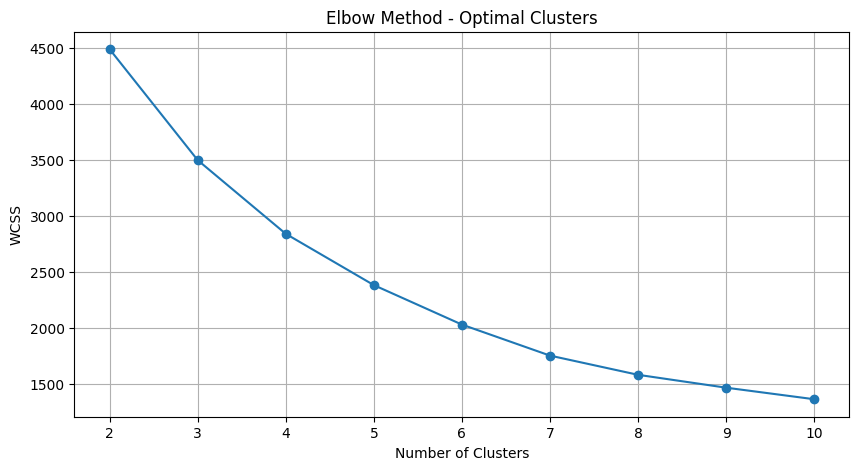

In [25]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
scaled_features_imputed = imputer.fit_transform(scaled_features)
wcss = []
silhouette_scores = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features_imputed)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_features_imputed, kmeans.labels_))

# Plot Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), wcss, marker='o')
plt.title("Elbow Method - Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()


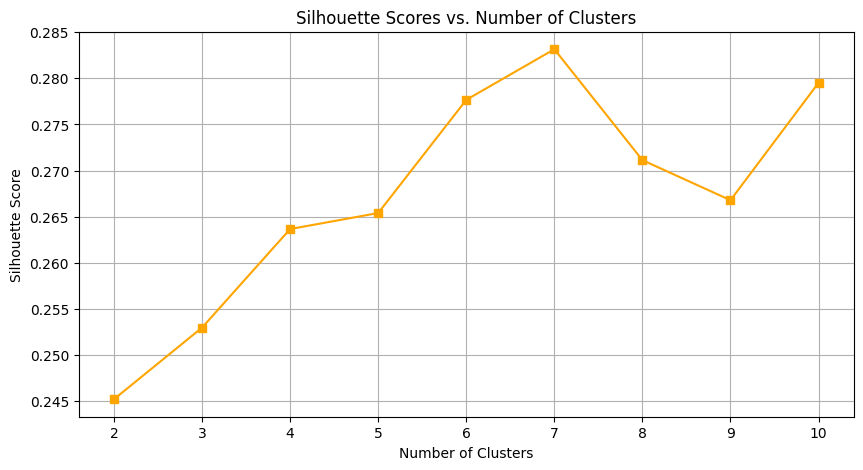

In [16]:
# Plot Silhouette Score
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores, marker='s', color='orange')
plt.title("Silhouette Scores vs. Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

To identify the optimal number of clusters, both the Elbow Method and Silhouette Score were used:

The Elbow Method showed a noticeable “bend” at k=5, suggesting diminishing returns beyond this point.
The Silhouette Score, which measures how similar a point is to its own cluster compared to others, also peaked around 5 clusters, validating our choice.
The KMeans algorithm was then applied with k=5. Each customer was assigned a cluster label, and this was appended to the dataset as a new column.


# K-means Clustering


In [19]:
# Apply KMeans Clustering with optimal cluster count (let's say 5 from elbow)
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features_imputed)


#4. Visualization

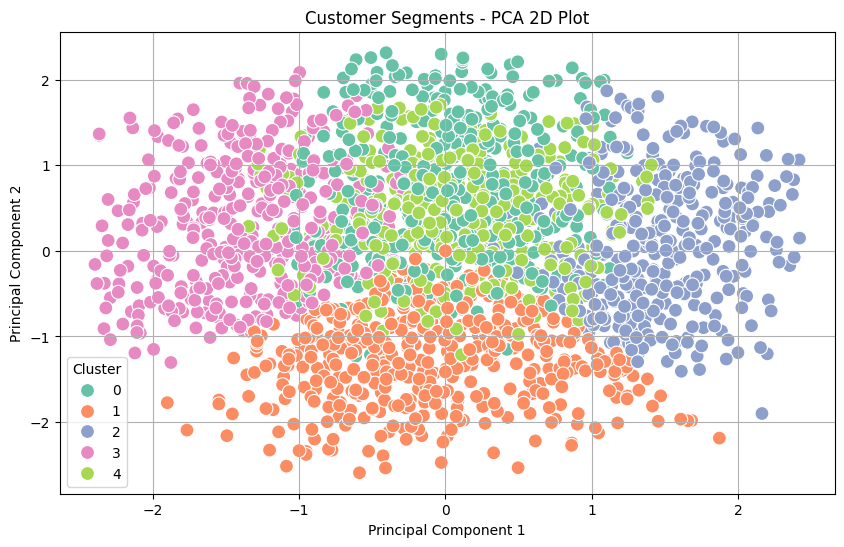

In [20]:
# Visualization using PCA (2D)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features_imputed)
df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=100)
plt.title("Customer Segments - PCA 2D Plot")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


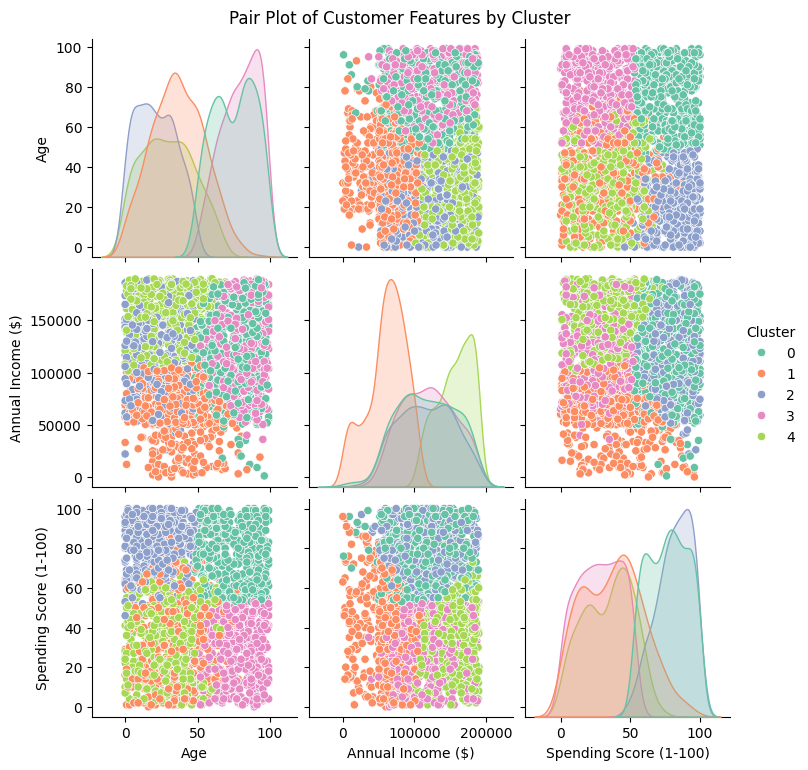

In [21]:
# Pair Plot
sns.pairplot(df[features + ['Cluster']], hue='Cluster', palette='Set2')
plt.suptitle("Pair Plot of Customer Features by Cluster", y=1.02)
plt.show()


PCA 2D Plot: Principal Component Analysis reduced the 3D feature space into 2D, enabling visualization of clusters. The scatter plot showed clear separation between most clusters.

Pair Plots: These explored pairwise relationships between Age, Income, and Spending Score for each cluster.

Centroids Table: The original scale centroids revealed the behavioral tendencies of each cluster, such as high spenders with high income or younger customers with moderate spending scores.

In [22]:
# Cluster Centroids
centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=features)
centroids['Cluster'] = range(optimal_clusters)
print("\n Cluster Centroids:\n", centroids)


 Cluster Centroids:
          Age  Annual Income ($)  Spending Score (1-100)  Cluster
0  74.898305      116603.084746               76.900726        0
1  36.484324       61404.587986               37.744205        1
2  21.196629      116075.191011               81.297753        2
3  79.415617      119193.272040               27.863980        3
4  29.415254      156042.929379               34.059322        4


# Recommendations Based on Clusters

Cluster 0 – Younger customers with moderate income but high spending scores.
- Best suited for loyalty rewards and exclusive deals to retain high engagement.

Cluster 1 – Older customers with low spending score and lower income.
- Not ideal for high-end product marketing, but suitable for budget-oriented promotions.

Cluster 2 – Middle-aged with high income and high spending score.
  - Primary target group for luxury or premium product campaigns.

Cluster 3 – Younger with low income and low spending scores.
- Potentially less valuable now, but can be targeted for engagement-based growth programs.

Cluster 4 – High income but very low spending score.
  - Indicates potential for re-engagement; explore reasons for low spending through surveys or personalized marketing.
